In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Mean Squared Error: 103226394.33
R^2 Score: 0.97


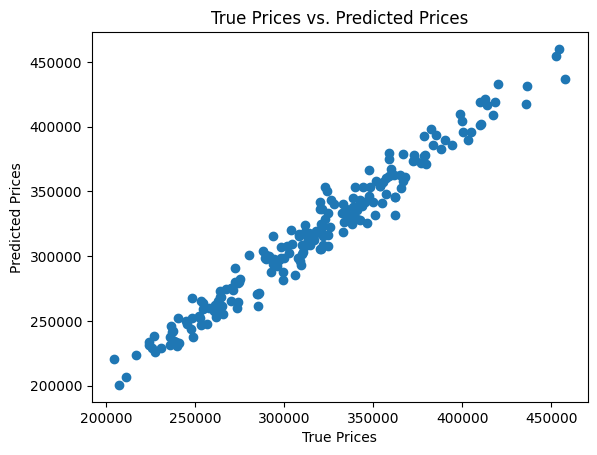

In [3]:
np.random.seed(42)
num_sam = 1000

# Features
square_footage = np.random.uniform(1000, 4000, num_sam)
bedrooms = np.random.randint(2, 6, num_sam)
bathrooms = np.random.uniform(1, 4, num_sam)

# True coefficients
true_intercept = 50000
coeff_square_footage = 50
coeff_bedrooms = 20000
coeff_bathrooms = 30000

# True house prices
true_prices = (
    true_intercept
    + coeff_square_footage * square_footage
    + coeff_bedrooms * bedrooms
    + coeff_bathrooms * bathrooms
    + np.random.normal(0, 10000, num_sam)
)

# Create a feature matrix X and target vector y
X = np.column_stack((square_footage, bedrooms, bathrooms))
y = true_prices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the true prices vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs. Predicted Prices")
plt.show()